# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [14]:
# A + B

In [15]:
# A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [24]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

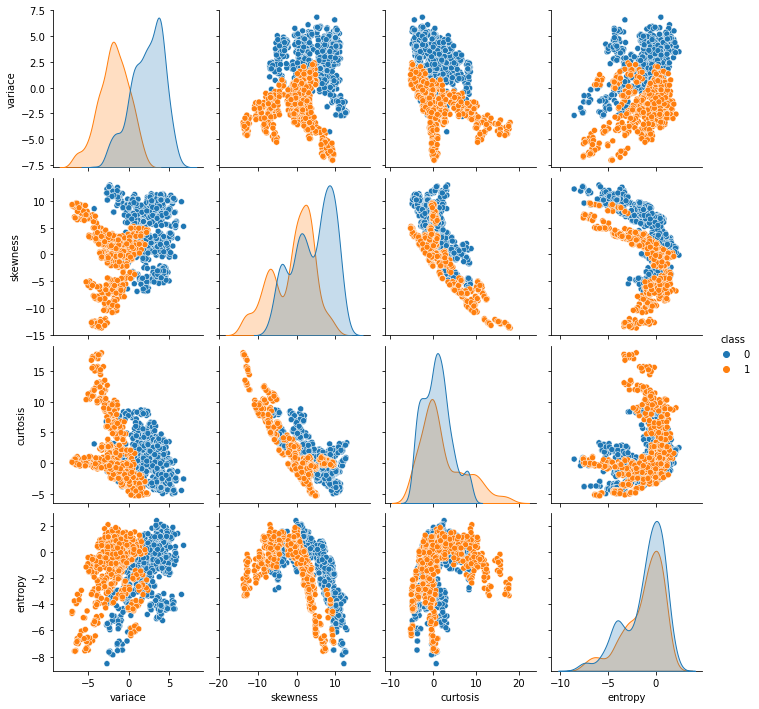

In [29]:
sns.pairplot(df, hue="class");

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99636364, 0.99270073, 0.99635036, 0.99635036])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

2022-01-14 23:23:14.435334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-14 23:23:14.435465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

2022-01-14 23:23:22.523363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-14 23:23:22.523568: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-14 23:23:22.523660: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Manish-S): /proc/driver/nvidia/version does not exist
2022-01-14 23:23:22.524551: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-14 23:23:22.739314: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optim

Epoch 1/10
30/30 [==============================] - 1s 3ms/step - loss: 1.1986 - accuracy: 0.0281
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.0333
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.9877 - accuracy: 0.0667
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.9107 - accuracy: 0.1604
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.8477 - accuracy: 0.2781
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.7959 - accuracy: 0.4375
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.7522 - accuracy: 0.5146
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.5604
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6010
Epoch 10/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6313


In [36]:
historydf = pd.DataFrame(history.history, index=history.epoch)

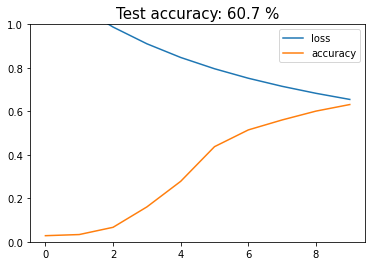

In [37]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [38]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [39]:
historydf = pd.concat(dflist, axis=1)

In [40]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,0.753308,0.537500,0.667203,0.595833,0.571318,0.700000,0.328849,0.880208
1,0.647864,0.594792,0.429548,0.823958,0.339380,0.863542,0.133344,0.964583
2,0.567907,0.669792,0.340516,0.891667,0.258824,0.925000,0.097488,0.973958
3,0.507577,0.741667,0.288964,0.928125,0.211410,0.950000,0.081787,0.977083
4,0.461786,0.819792,0.253256,0.943750,0.180450,0.957292,0.072263,0.978125
5,0.426313,0.880208,0.226919,0.942708,0.158733,0.962500,0.065782,0.979167
6,0.398083,0.898958,0.206305,0.951042,0.142895,0.967708,0.061276,0.980208
7,0.375144,0.908333,0.189790,0.958333,0.130704,0.968750,0.057768,0.980208
8,0.356042,0.914583,0.176270,0.962500,0.121100,0.968750,0.055111,0.981250
9,0.339771,0.921875,0.165052,0.964583,0.113339,0.969792,0.052942,0.981250


In [41]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [42]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.753308  0.537500  0.667203  0.595833  0.571318  0.700000   
1              0.647864  0.594792  0.429548  0.823958  0.339380  0.863542   
2              0.567907  0.669792  0.340516  0.891667  0.258824  0.925000   
3              0.507577  0.741667  0.288964  0.928125  0.211410  0.950000   
4              0.461786  0.819792  0.253256  0.943750  0.180450  0.957292   
5              0.426313  0.880208  0.226919  0.942708  0.158733  0.962500   
6              0.398083  0.898958  0.206305  0.951042  0.142895  0.967708   
7              0.375144  0.908333  0.189790  0.958333  0.130704  0.968750   
8              0.356042  0.914583  0.176270  0.962500  0.121100  0.968750   
9              0.339771  0.921875  0.165052  0.964583  0.113339  0.969792   

learning_rate      0.50            
metric             loss  accuracy  
0              0.328849  0.880208  
1              0.133344  0.964583  
2              0.097488  0.973958  
3              0.081787  0.977083  
4              0.072263  0.978125  
5              0.065782  0.979167  
6              0.061276  0.980208  
7              0.057768  0.980208  
8              0.055111  0.981250  
9              0.052942  0.981250

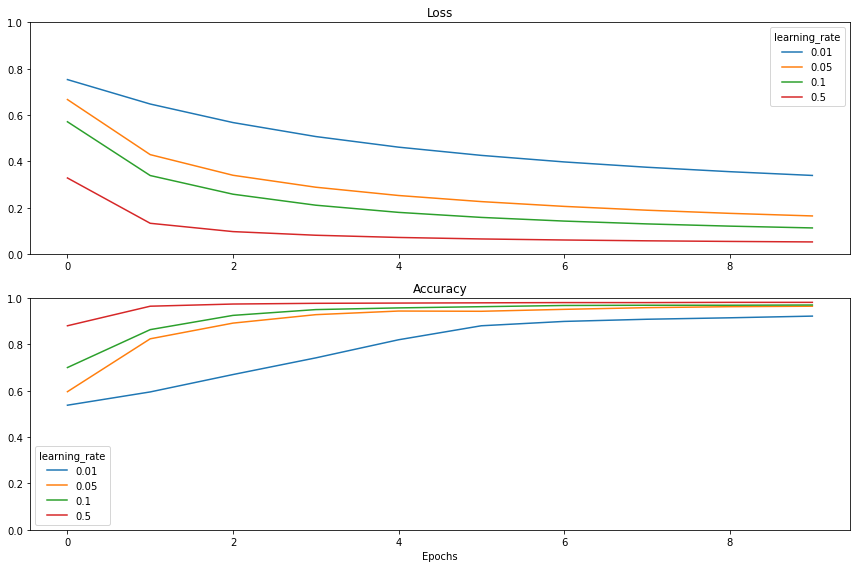

In [43]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [44]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [45]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [46]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.428732  0.833333  0.757592  0.523958  1.406256  0.134375   
1           0.369085  0.884375  0.724599  0.569792  1.326341  0.131250   
2           0.330014  0.916667  0.695477  0.600000  1.251389  0.130208   
3           0.302767  0.929167  0.669564  0.625000  1.181555  0.133333   
4           0.282912  0.935417  0.646392  0.646875  1.116893  0.133333   
5           0.267749  0.942708  0.625403  0.665625  1.057278  0.127083   
6           0.255742  0.942708  0.606305  0.678125  1.002761  0.137500   
7           0.245947  0.943750  0.588716  0.689583  0.952966  0.158333   
8           0.237683  0.945833  0.572588  0.693750  0.907629  0.194792   
9           0.230508  0.946875  0.557568  0.704167  0.866518  0.235417   

batch_size       128            
metric          loss  accuracy  
0           0.528365  0.761458  
1           0.520411  0.777083  
2           0.512768  0.782292  
3           0.505417  0.793750  
4           0.498393  0.800000  
5           0.491782  0.804167  
6           0.485473  0.814583  
7           0.479496  0.820833  
8           0.473709  0.831250  
9           0.468202  0.837500

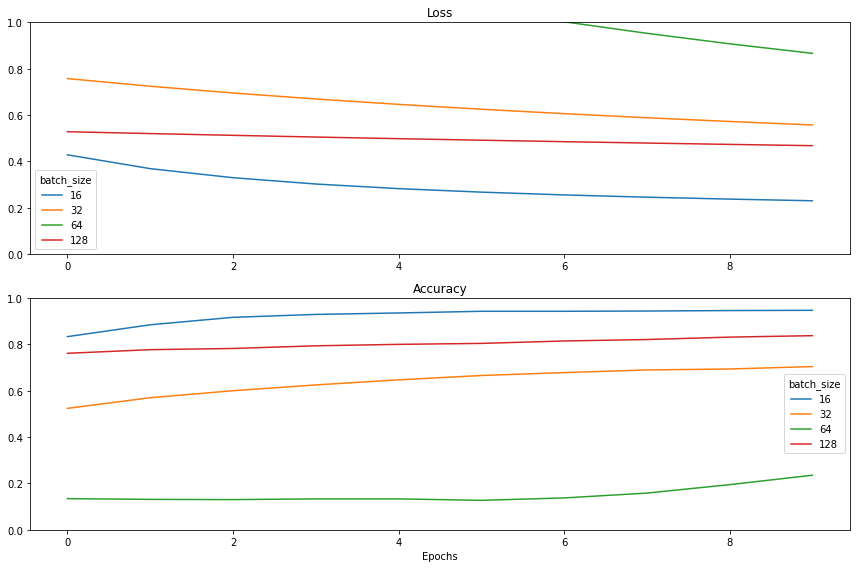

In [47]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [48]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [50]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

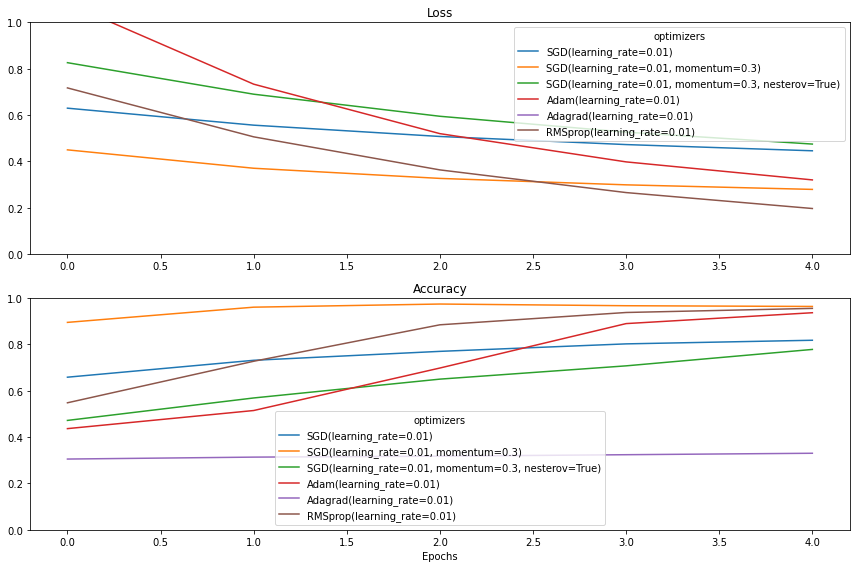

In [51]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [52]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

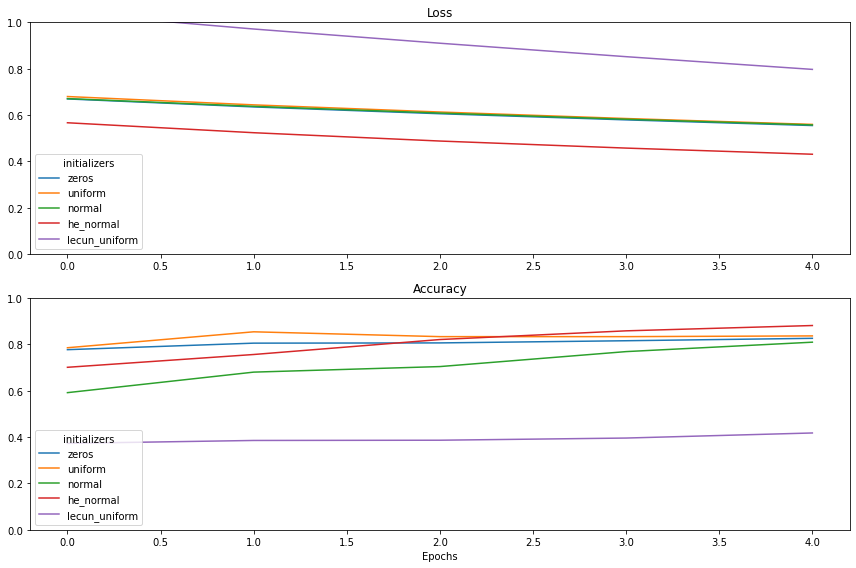

In [54]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [55]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20
42/42 [==============================] - 1s 10ms/step - loss: 0.6659 - accuracy: 0.7262 - val_loss: 0.5617 - val_accuracy: 0.9757
Epoch 2/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.9583 - val_loss: 0.3604 - val_accuracy: 0.9618
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2792 - accuracy: 0.9568 - val_loss: 0.2069 - val_accuracy: 0.9583
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9583 - val_loss: 0.1152 - val_accuracy: 0.9688
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9673 - val_loss: 0.0674 - val_accuracy: 0.9826
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9762 - val_loss: 0.0484 - val_accuracy: 0.9826
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.9821 - val_loss: 0.0402 - val_accuracy: 0.9826
Epoch 8/20
42/42 [=

In [56]:
result

[0.027906382456421852, 0.987864077091217]

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.layers

In [59]:
inp = model.layers[0].input
out = model.layers[0].output

In [60]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [61]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [62]:
features_function = K.function([inp], [out])

In [63]:
features_function

<function tensorflow.python.keras.backend.function.<locals>.func(model_inputs)>

In [64]:
features_function([X_test])[0].shape

(412, 2)

In [65]:
features = features_function([X_test])[0]

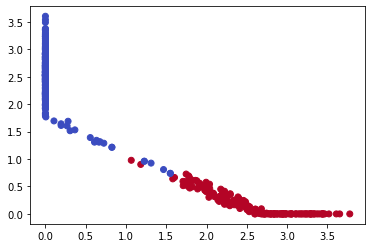

In [66]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [67]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

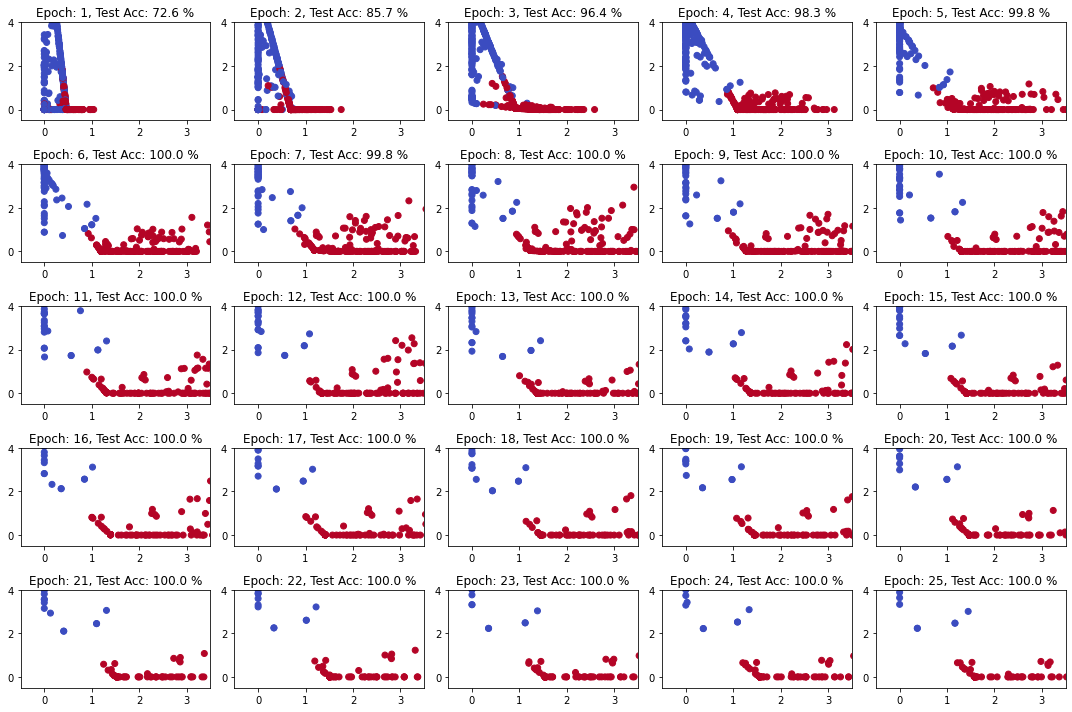

In [68]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [69]:
df = pd.read_csv('../data/wines.csv')

In [70]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
y = df['Class']

In [72]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [73]:
y_cat = pd.get_dummies(y)

In [74]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [75]:
X = df.drop('Class', axis=1)

In [76]:
X.shape

(178, 13)

In [77]:
import seaborn as sns

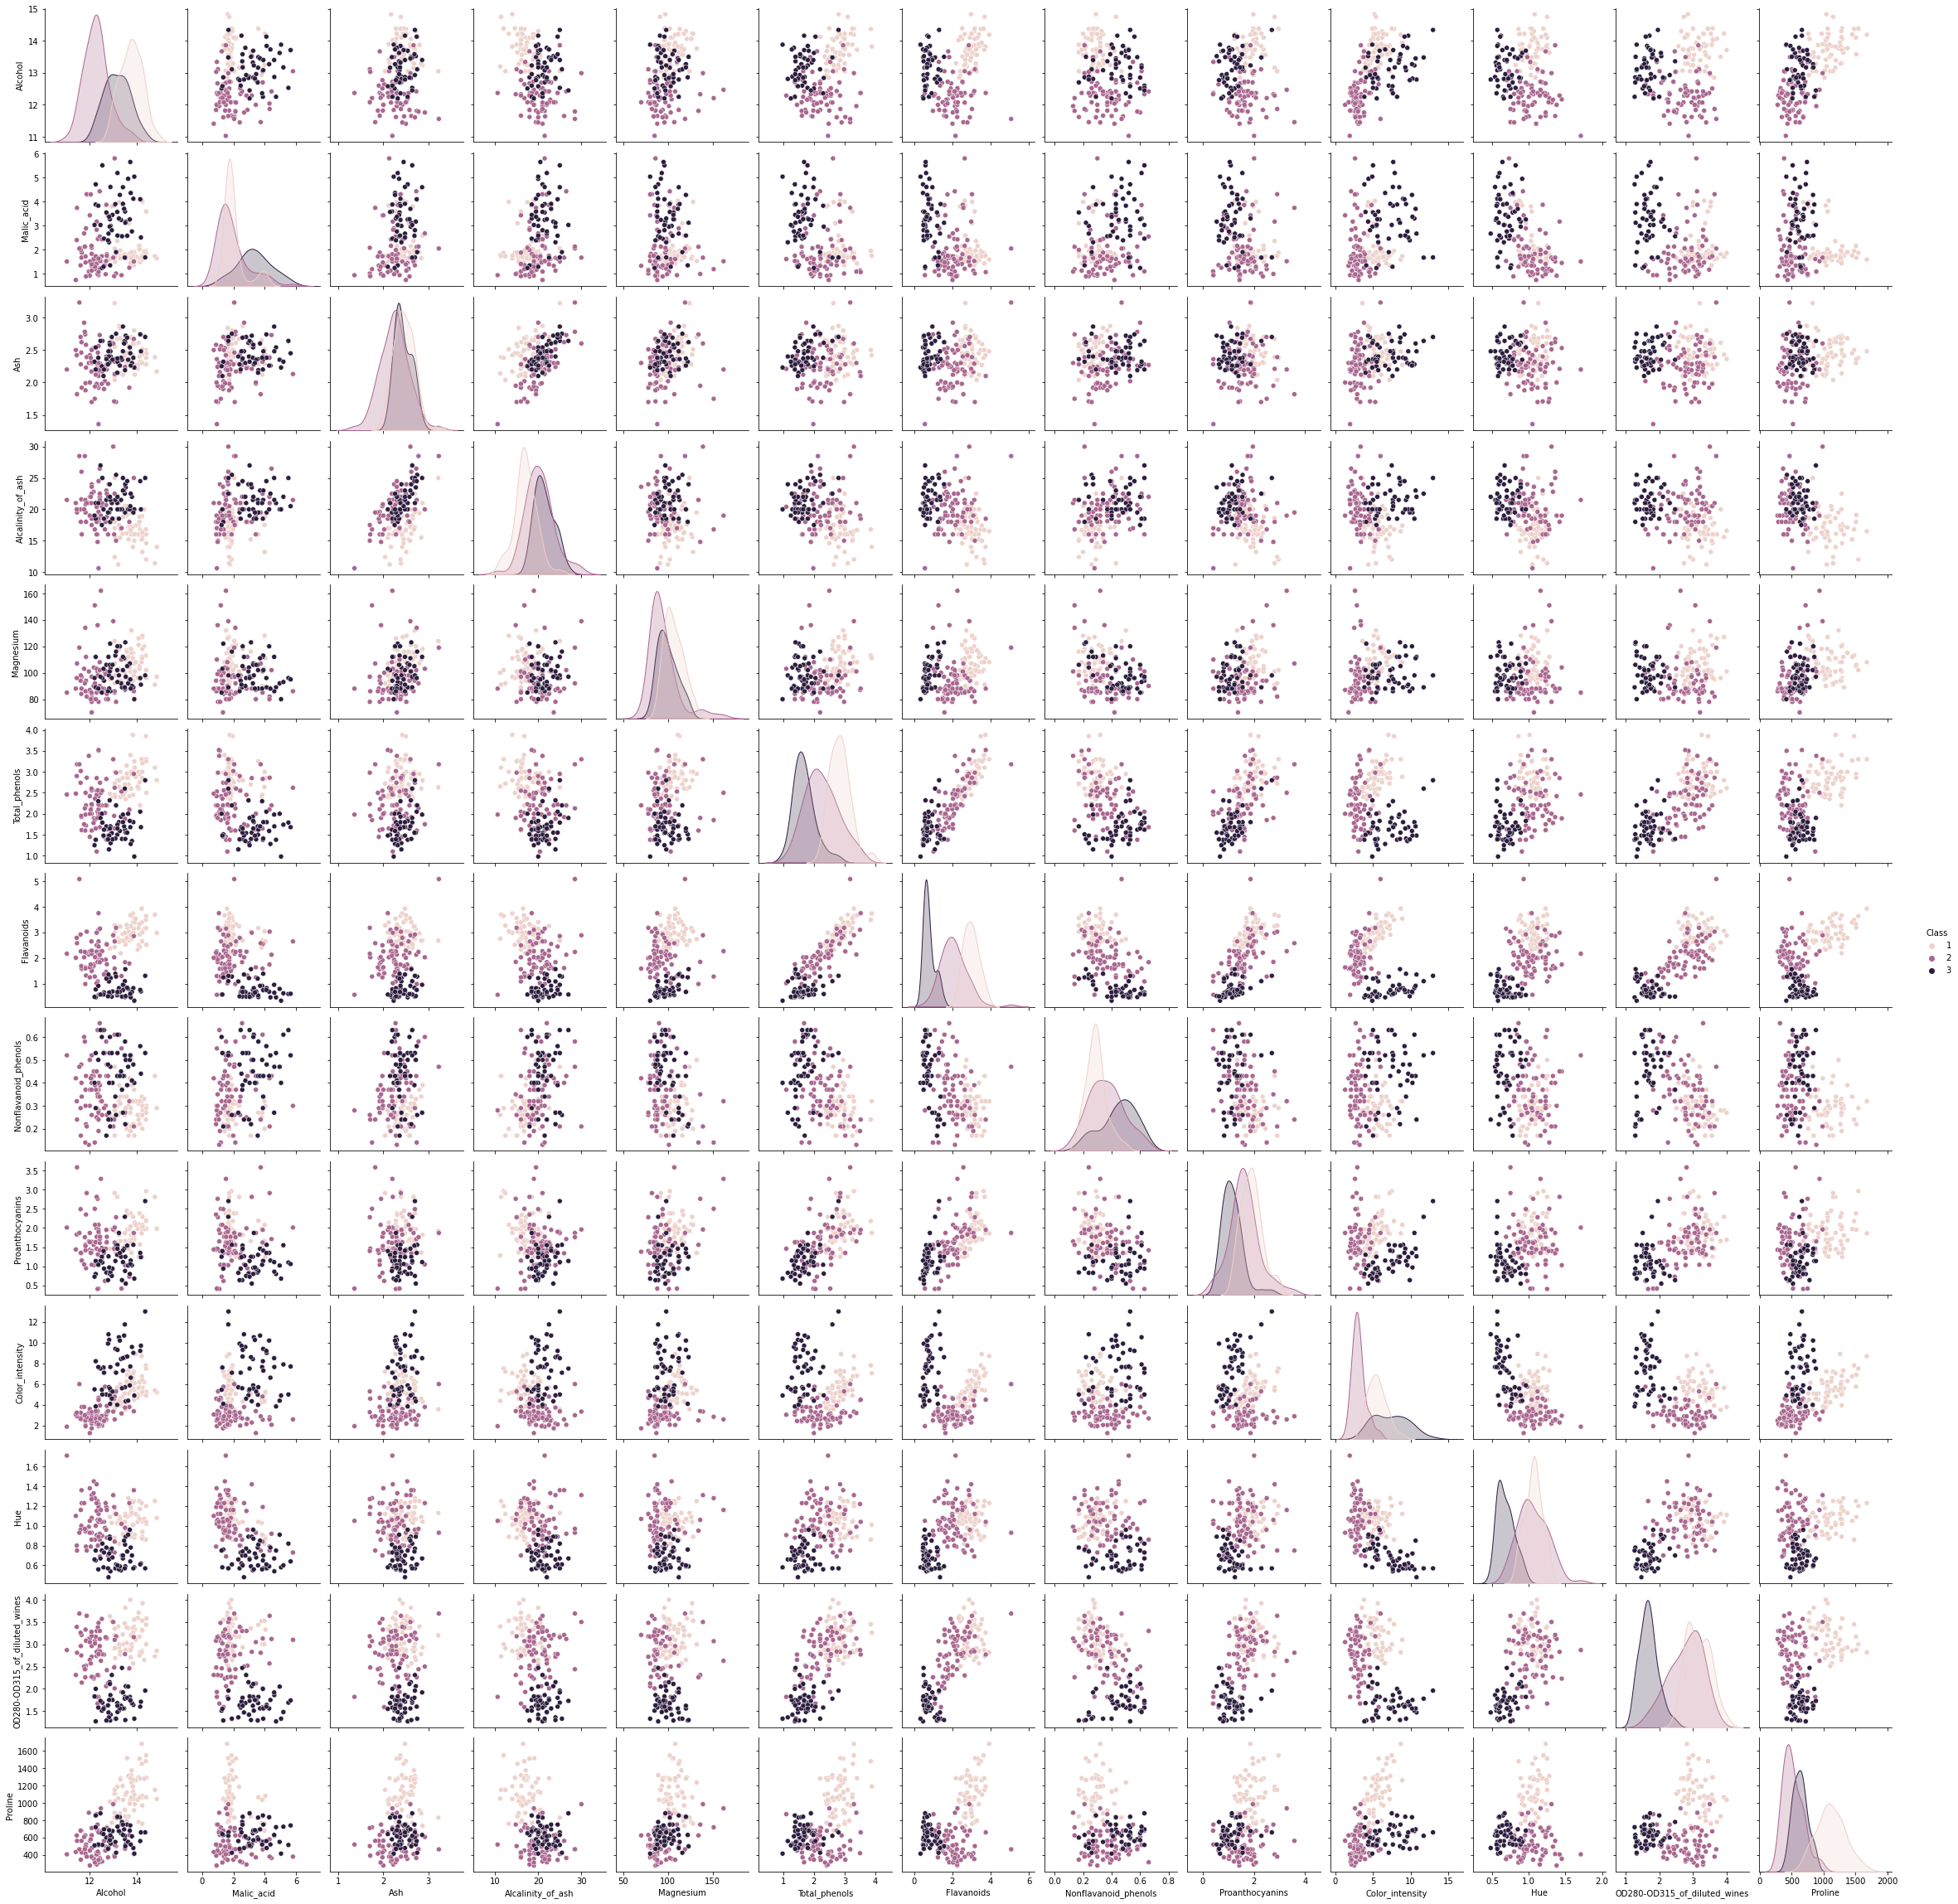

In [78]:
sns.pairplot(df, hue='Class')

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()

In [81]:
Xsc = sc.fit_transform(X)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import tensorflow.keras.backend as K

In [83]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(learning_rate=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 1s 14ms/step - loss: 0.4822 - accuracy: 0.7958 - val_loss: 1.8172 - val_accuracy: 0.0833
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0946 - accuracy: 0.9648 - val_loss: 0.9933 - val_accuracy: 0.8889
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9859 - val_loss: 0.3864 - val_accuracy: 0.9722
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9930 - val_loss: 0.5293 - val_accuracy: 0.8889
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.2373 - val_accuracy: 0.9722
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2604 - val_accuracy: 0.9444
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9859 - val_loss: 0.2044 - val_accuracy: 0.9722
Epoch 8/10
18/18 [=

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [85]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
                kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(learning_rate=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 5ms/step - loss: 0.6083 - accuracy: 0.7247
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9494
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.9775
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9888
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9831
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9944
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9719
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [87]:
inp = model.layers[0].input
out = model.layers[2].output

In [88]:
features_function = K.function([inp], [out])

In [89]:
features = features_function([Xsc])[0]

In [90]:
features.shape

(178, 2)

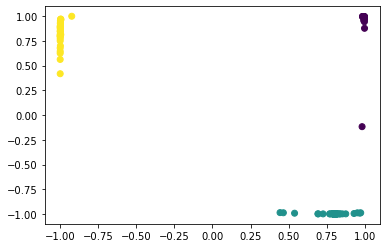

In [91]:
plt.scatter(features[:, 0], features[:, 1], c=y)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [92]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [97]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(learning_rate=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 3ms/step - loss: 0.6818 - accuracy: 0.7022
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9438
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9944
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9831
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1401 - accuracy: 0.9663
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9831
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9888
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9944
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9831
Epoch 10/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [98]:
features_function = K.function([inputs], [second_to_last])

In [99]:
features = features_function([Xsc])[0]

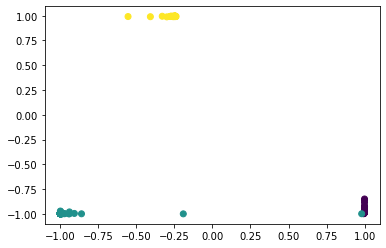

In [100]:
plt.scatter(features[:, 0], features[:, 1], c=y)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [101]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [102]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [103]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

In [104]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

2022-01-15 00:40:15.326584: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-15 00:40:15.327474: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-15 00:40:15.333802: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [107]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(learning_rate=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 1/20


2022-01-15 00:40:18.629213: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-15 00:40:18.629332: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-15 00:40:18.639904: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-15 00:40:18.653729: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-15 00:40:18.678379: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/udemy/tensorboard/train/plugins/profile/2022_01_15_00_40_18
2022-01-15 00:40:18.681825: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /tmp/udemy/tensorboard/train/plugins/profile/2022_01_15_00_40_18/Manish-S.trace.json.gz
2022-01-15 00:40:18.716715: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/udemy/tensorboard/train/plugins/profile/2

4/4 - 1s - loss: 0.7657 - accuracy: 0.7339 - val_loss: 0.4912 - val_accuracy: 0.9259

Epoch 00001: val_loss improved from inf to 0.49125, saving model to /tmp/udemy/weights.hdf5
Epoch 2/20
4/4 - 0s - loss: 0.3534 - accuracy: 0.9919 - val_loss: 0.3028 - val_accuracy: 0.9444

Epoch 00002: val_loss improved from 0.49125 to 0.30283, saving model to /tmp/udemy/weights.hdf5
Epoch 3/20
4/4 - 0s - loss: 0.2420 - accuracy: 0.9758 - val_loss: 0.2449 - val_accuracy: 0.9630

Epoch 00003: val_loss improved from 0.30283 to 0.24487, saving model to /tmp/udemy/weights.hdf5
Epoch 4/20
4/4 - 0s - loss: 0.1762 - accuracy: 0.9839 - val_loss: 0.2046 - val_accuracy: 0.9630

Epoch 00004: val_loss improved from 0.24487 to 0.20462, saving model to /tmp/udemy/weights.hdf5
Epoch 5/20
4/4 - 0s - loss: 0.1555 - accuracy: 0.9839 - val_loss: 0.1657 - val_accuracy: 0.9630

Epoch 00005: val_loss improved from 0.20462 to 0.16570, saving model to /tmp/udemy/weights.hdf5
Epoch 6/20
4/4 - 0s - loss: 0.1116 - accuracy: 0.9